# InputOutput

Veremos cómo guardar y leer objetos desde archivos ROOT. Un archivo ROOT es como un directorio de archivos UNIX. Puede contener directorios y objetos organizados en un número ilimitado de niveles. También se almacena en formato independiente de la máquina. 

__Ejemplo:__ En este ejemplo se crea un archivo ROOT y 15 histogramas, llena cada histograma con 1000 entradas de una distribución gaussiana y las escribe en el archivo.

In [1]:
#Debemos llamar las diferentes clases que vamos a usar:
from ROOT import TObjArray, TH1F, TFile
# crear un arreglo de root
Hlist = TObjArray(0)

#LLeno la el arreglo con histogramas
for i in range( 15 ):
    name = "Histograma"+str(i)
    title = "Histograma_"+str(i)
    h = TH1F(name,title,100,-4,4)
    h.FillRandom("gaus",1000)
    Hlist.Add(h)
    del h
# abre un archivo y escribe el arreglo en el archivo
f = TFile("demo.root","recreate")
Hlist.Write()
f.Close()

Welcome to JupyROOT 6.22/03


Una vez que tenemos el objeto `TFile`, podemos llamar al método `TFile.Map()` para ver el diseño físico. La salida imprime la fecha/hora, la dirección del registro de inicio, el número de bytes en el registro, el nombre de clase del registro y el factor de compresión.

In [2]:
#Abrimos un archivo .root y asignamos su contenido al objeto TFile f
f = TFile("demo.root")
#Aplicamos el operador Map() sobre f
f.Map()

20201014/215607  At:100     N=114       TFile         
20201014/215607  At:214     N=445       TH1F           CX =  2.27
20201014/215607  At:659     N=439       TH1F           CX =  2.30
20201014/215607  At:1098    N=440       TH1F           CX =  2.30
20201014/215607  At:1538    N=440       TH1F           CX =  2.30
20201014/215607  At:1978    N=441       TH1F           CX =  2.29
20201014/215607  At:2419    N=439       TH1F           CX =  2.30
20201014/215607  At:2858    N=433       TH1F           CX =  2.33
20201014/215607  At:3291    N=445       TH1F           CX =  2.27
20201014/215607  At:3736    N=437       TH1F           CX =  2.31
20201014/215607  At:4173    N=437       TH1F           CX =  2.31
20201014/215607  At:4610    N=444       TH1F           CX =  2.29
20201014/215607  At:5054    N=441       TH1F           CX =  2.30
20201014/215607  At:5495    N=444       TH1F           CX =  2.29
20201014/215607  At:5939    N=440       TH1F           CX =  2.31
20201014/215607  At:6

## TFile y TKey

El método `Map ()` lee el archivo secuencialmente muestra la información sobre cada registro mientras escanea el archivo. Puesto que ROOT fue creado para manejo de grandes volumenes de datos es factible usar  el acceso secuencial, aleatorio o directo. Para esto último, `TFile` mantiene una lista de `TKeys`, que es esencialmente un índice de los objetos del archivo. La clase `TKey` describe los encabezados de registro de los objetos del archivo. 

__Ejemplo:__ para obtener la lista de claves e imprimirlas (`TFile.GetListOfKeys()`). Para encontrar un objeto específico en el archivo, se usa el método `TFile.Get()`.

In [6]:
#Aplicamos el método Get() sobre f y usamos el método Print() para visualizar
f.GetListOfKeys().Print()
#Cerramos el archivo
f.Close()

Collection name='THashList', class='THashList', size=15
 TKey Name = Histograma0, Title = Histograma_0, Cycle = 1
 TKey Name = Histograma1, Title = Histograma_1, Cycle = 1
 TKey Name = Histograma2, Title = Histograma_2, Cycle = 1
 TKey Name = Histograma3, Title = Histograma_3, Cycle = 1
 TKey Name = Histograma4, Title = Histograma_4, Cycle = 1
 TKey Name = Histograma5, Title = Histograma_5, Cycle = 1
 TKey Name = Histograma6, Title = Histograma_6, Cycle = 1
 TKey Name = Histograma7, Title = Histograma_7, Cycle = 1
 TKey Name = Histograma8, Title = Histograma_8, Cycle = 1
 TKey Name = Histograma9, Title = Histograma_9, Cycle = 1
 TKey Name = Histograma10, Title = Histograma_10, Cycle = 1
 TKey Name = Histograma11, Title = Histograma_11, Cycle = 1
 TKey Name = Histograma12, Title = Histograma_12, Cycle = 1
 TKey Name = Histograma13, Title = Histograma_13, Cycle = 1
 TKey Name = Histograma14, Title = Histograma_14, Cycle = 1


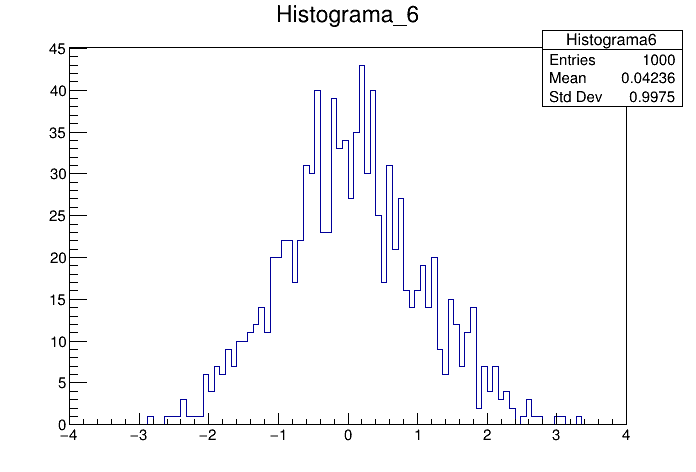

In [7]:
#Debemos llamar las diferentes clases que vamos a usar
from ROOT import TH1F, TFile, TCanvas
#Abrimos un archivo .root y asignamos su contenido al objeto TFile f
f = TFile("demo.root")
#Ahora usemos Get para obtener el Histograma6
Histo_6 = f.Get("Histograma6")
# Ahora se crea un Canvas para dibujar
c1 = TCanvas( 'c1', 'Histograma_6')
#Dibujamos el histograma
Histo_6.Draw()
#Mostramos el canvas.
c1.Draw()
#Cerramos el archivo
f.Close()

## El directorio actual
Cuando se crea un objeto `TFile`, se convierte en el "directorio" actual. Por lo tanto, el último archivo que se abre es siempre el directorio actual. Para verificar su directorio actual, puede usar la clase `gDirectory` y el método de esta clase `pwd()`.

In [9]:
from ROOT import gDirectory
gDirectory.pwd()

demo.root:/


In [15]:
#Si tiene dos archivos en uso, el último es el que directorio actual
f1 = TFile("File1.root","recreate")
gDirectory.pwd()
f2 = TFile("File2.root","recreate")
gDirectory.pwd()

File1.root:/
File2.root:/
File2.root:/


Error in <TFile::cd>: Unknown directory File1.root


In [16]:
f = TFile("demo.root")
f.ls()

TFile**		demo.root	
 TFile*		demo.root	
  KEY: TH1F	Histograma0;1	Histograma_0
  KEY: TH1F	Histograma1;1	Histograma_1
  KEY: TH1F	Histograma2;1	Histograma_2
  KEY: TH1F	Histograma3;1	Histograma_3
  KEY: TH1F	Histograma4;1	Histograma_4
  KEY: TH1F	Histograma5;1	Histograma_5
  KEY: TH1F	Histograma6;1	Histograma_6
  KEY: TH1F	Histograma7;1	Histograma_7
  KEY: TH1F	Histograma8;1	Histograma_8
  KEY: TH1F	Histograma9;1	Histograma_9
  KEY: TH1F	Histograma10;1	Histograma_10
  KEY: TH1F	Histograma11;1	Histograma_11
  KEY: TH1F	Histograma12;1	Histograma_12
  KEY: TH1F	Histograma13;1	Histograma_13
  KEY: TH1F	Histograma14;1	Histograma_14


In [ ]:
##Saving Histograms to Disk

In [ ]:
###Histograms and the Current Directory

In [ ]:
## Saving Objects to Disk

In [ ]:
## Retrieving Objects from Disk

# TTree

En el capítulo "Entrada / Salida", vimos cómo se pueden guardar los objetos en archivos ROOT. En caso de que desee almacenar grandes cantidades de objetos de la misma clase, ROOT ha diseñado las clases TTree y TNtuple específicamente para ese propósito. La clase TTree está optimizada para reducir el espacio en disco y mejorar la velocidad de acceso. Un TNtuple es un TTree que se limita a contener solo números de punto flotante; un TTree, por otro lado, puede contener todo tipo de datos, como objetos o matrices, además de todos los tipos simples.